## Exploring Weather Trend 

Submission:

* An outline of steps taken to prepare the data to be visualized in the chart, such as:
       
     
    * What tools did you use for each step?
      SQL and Python 
      
    * How did you calculate the moving average?
       Use pd.rolling() in Python
 
    * What were your key considerations when deciding how to visualize the trends?
        For example, what kind of charts can better represent the trend? 
        Are their data calculated by same definition, so they can plot together?
    
    
    
* Line chart with local and global temperature trends

* At least four observations about the similarities and/or differences in the trends

In [ ]:
#Accessing Data - SQL code as follows
SELECT city, country 
FROM city_list;

SELECT * FROM city_data
WHERE country LIKE 'Taiwan';

SELECT * FROM global_data;

In [24]:
#data wrangling and data viz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_city = pd.read_csv('city_list.csv')
df_taiwan = pd.read_csv('Taiwan weather data.csv')
df_global = pd.read_csv('global weather data.csv')

In [25]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 2 columns):
city       345 non-null object
country    345 non-null object
dtypes: object(2)
memory usage: 5.5+ KB


In [26]:
df_taiwan.head()

,year,city,country,avg_temp
0,1841,Kaohsiung,Taiwan,22.19
1,1842,Kaohsiung,Taiwan,22.51
2,1843,Kaohsiung,Taiwan,22.60
3,1844,Kaohsiung,Taiwan,22.23
4,1845,Kaohsiung,Taiwan,22.29


In [27]:
df_taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 4 columns):
year        519 non-null int64
city        519 non-null object
country     519 non-null object
avg_temp    519 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.3+ KB


In [28]:
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [29]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [30]:
#calculating rolling average
df_global['MA_temp'] = df_global['avg_temp'].rolling(window=7).mean()
df_global.rename(columns={'avg_temp':'avg_temp_global', 'MA_temp':'MA_temp_global'}, inplace = True)
df_global.head(10)

,year,avg_temp_global,MA_temp_global
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,8.078571
7,1757,9.02,8.121429
8,1758,6.74,7.944286
9,1759,7.99,8.260000


In [31]:
df_taipei = df_taiwan.loc[df_taiwan["city"] == "Taipei"]
df_taipei['MA_temp'] = df_taipei['avg_temp'].rolling(window = 5).mean()
df_taipei.head(8)

/Users/joanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,city,country,avg_temp,MA_temp
346,1841,Taipei,Taiwan,21.35,NaN
347,1842,Taipei,Taiwan,21.73,NaN
348,1843,Taipei,Taiwan,21.82,NaN
349,1844,Taipei,Taiwan,21.47,NaN
350,1845,Taipei,Taiwan,21.57,21.588
351,1846,Taipei,Taiwan,22.09,21.736
352,1847,Taipei,Taiwan,21.86,21.762
353,1848,Taipei,Taiwan,21.36,21.670


In [32]:
#deal with the missing data in the column of moving average temperature
#approach 1: replace missing values with the original average temperature (which is the way I saw other ppl do on google)
df_taipei.loc[df_taipei['MA_temp'].isnull(),'MA_temp'] = df_taipei['avg_temp']
df_taipei.head(10)

#approach 2: fill NaN with average
#df_taipei.fillna(df_taipei['MA_temp'].mean(), inplace = True)
#df_taipei.head()

/Users/joanna/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,year,city,country,avg_temp,MA_temp
346,1841,Taipei,Taiwan,21.35,21.350
347,1842,Taipei,Taiwan,21.73,21.730
348,1843,Taipei,Taiwan,21.82,21.820
349,1844,Taipei,Taiwan,21.47,21.470
350,1845,Taipei,Taiwan,21.57,21.588
351,1846,Taipei,Taiwan,22.09,21.736
352,1847,Taipei,Taiwan,21.86,21.762
353,1848,Taipei,Taiwan,21.36,21.670
354,1849,Taipei,Taiwan,21.68,21.712
355,1850,Taipei,Taiwan,21.88,21.774


In [33]:
df_global.describe()

,year,avg_temp_global,MA_temp_global
count,266.000000,266.000000,260.000000
mean,1882.500000,8.369474,8.360225
std,76.931788,0.584747,0.472714
min,1750.000000,5.780000,7.191429
25%,1816.250000,8.082500,8.056786
50%,1882.500000,8.375000,8.307143
75%,1948.750000,8.707500,8.631786
max,2015.000000,9.830000,9.607143


In [34]:
df_taipei.describe()

,year,avg_temp,MA_temp
count,173.000000,173.000000,173.000000
mean,1927.000000,22.213988,22.198532
std,50.084928,0.514873,0.447102
min,1841.000000,20.860000,21.350000
25%,1884.000000,21.880000,21.852000
50%,1927.000000,22.210000,22.138000
75%,1970.000000,22.560000,22.518000
max,2013.000000,23.780000,23.304000


In [35]:
df_all = pd.merge(df_taipei, df_global, on = 'year', how = 'outer')
df_all.head(15)

,year,city,country,avg_temp,MA_temp,avg_temp_global,MA_temp_global
0,1841,Taipei,Taiwan,21.35,21.350,7.69,7.585714
1,1842,Taipei,Taiwan,21.73,21.730,8.02,7.675714
2,1843,Taipei,Taiwan,21.82,21.820,8.17,7.742857
3,1844,Taipei,Taiwan,21.47,21.470,7.65,7.781429
4,1845,Taipei,Taiwan,21.57,21.588,7.85,7.830000
5,1846,Taipei,Taiwan,22.09,21.736,8.55,7.961429
6,1847,Taipei,Taiwan,21.86,21.762,8.09,8.002857
7,1848,Taipei,Taiwan,21.36,21.670,7.98,8.044286
8,1849,Taipei,Taiwan,21.68,21.712,7.98,8.038571
9,1850,Taipei,Taiwan,21.88,21.774,7.90,8.000000


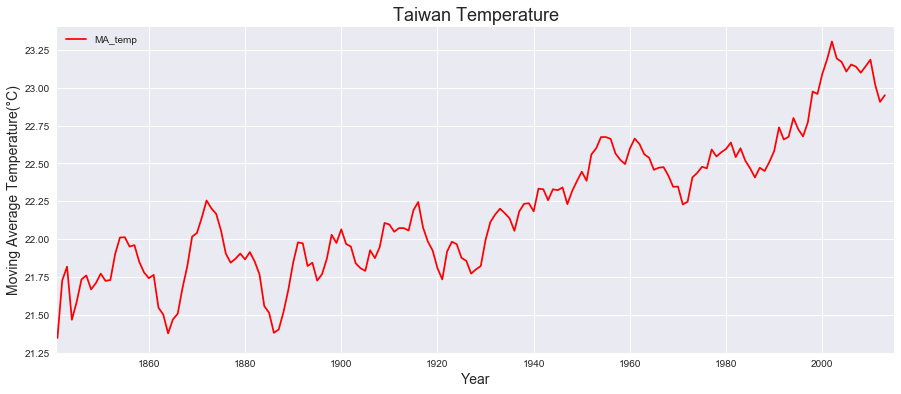

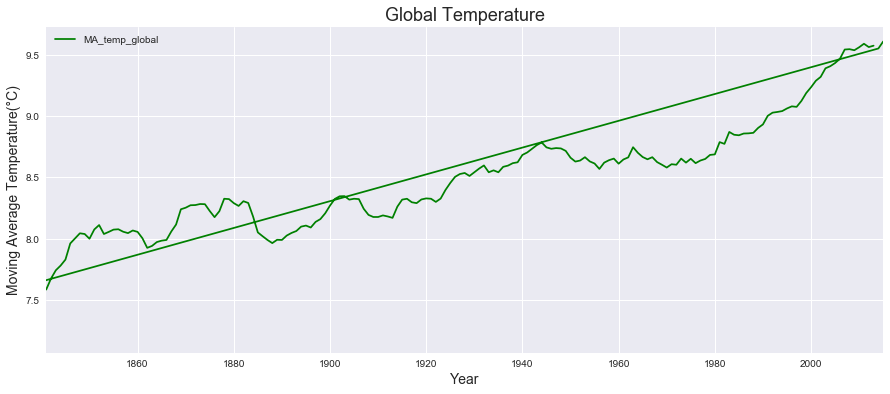

In [36]:
#Create a line chart with details
df_all.plot('year','MA_temp', kind = 'line', color = 'red', figsize = (15,6))
plt.title('Taiwan Temperature', fontsize = 18)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Moving Average Temperature(°C)', fontsize= 14)
df_all.plot('year','MA_temp_global', kind = 'line', color = 'green', figsize = (15,6))
plt.title('Global Temperature', fontsize = 18)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Moving Average Temperature(°C)', fontsize= 14)

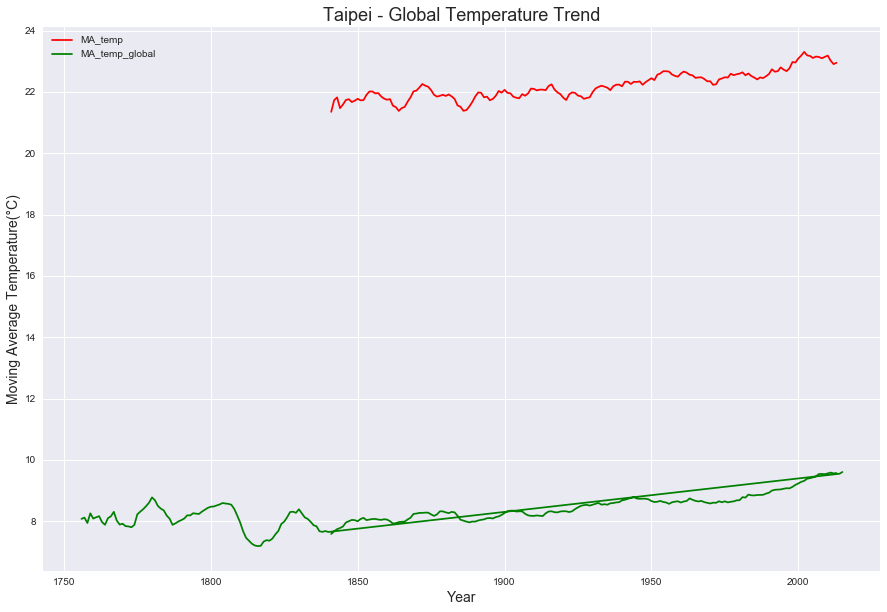

In [37]:
#Combined Line Chart
#compares your city’s temperatures with the global temperatures
plt.figure(figsize = (15, 10))
plt.plot('year','MA_temp', data = df_all, color = 'red')
plt.plot('year','MA_temp_global', data = df_all, color = 'green')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Moving Average Temperature(°C)', fontsize = 14)
plt.title('Taipei - Global Temperature Trend', fontsize = 18)
plt.legend()

## Findings
    1. Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

    First of all, the average temprature in Taipei is around 22.2°C, from 20 - 24°C while that of the global is around 8.4°C, from 5 - 10°C. So, Taipei where I live in is hotter, as opposed to the globe temperature. According to the above chart, the overall temperature in Taipei is also higher than the globe over years. The different is consistent over time. 

    2. How do the changes in your city’s temperatures over time compare to the changes in the global average?
    3. What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?
    According to the chart, the avg temperatures in both Taipei and the globe are increasing over the year overall, though the temperature goes down in several short period, like 1870- 1890. Both increase at the nearly same pace. 
    
    4. The increasing pace for both Taipei and the globe is particularly rapid from 1990 - 2000, yet it starts to slow down slightly after 2000. It might be influenced by the Kyoto Protocol signed in 19997.
    
    